# Interference

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import uniform_filter1d

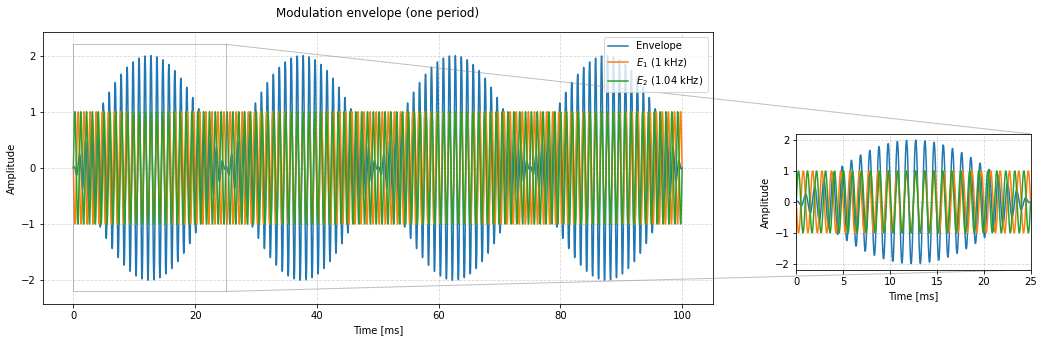

In [2]:
base_f = 1.
df_f = 1.04

periods = 3*37.5
time = np.arange(12.5, (1/base_f)*periods, 1e-3)

sin_base = np.sin(2*np.pi*base_f*time)
sin_df = np.sin(2*np.pi*df_f*time)

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 1, 1)

time = time - 12.5
ax1.plot(time, sin_base + sin_df, label="Envelope")
ax1.plot(time, sin_base, label="$E_1$ (1 kHz)")
ax1.plot(time, sin_df, label="$E_2$ (1.04 kHz)")

ax1.set_title('Modulation envelope (one period)', pad=15)
ax1.set_xlabel('Time [ms]')
ax1.set_ylabel('Amplitude')

ax1.grid(True, ls = '--', alpha = 0.5)
ax1.legend(loc="upper right")

bth = sin_base + sin_df
zoom = ax1.inset_axes([1.125, 0.125, 0.35, 0.5])
zoom.plot(time, sin_base + sin_df)
zoom.plot(time, sin_base)
zoom.plot(time, sin_df)

zoom.set_xlim(0, 25)
#zoom.set_ylim(3.8, 4.2)
zoom.set_xlabel('Time [ms]')
zoom.set_ylabel('Amplitude')
zoom.grid(True, ls = '--', alpha = 0.5)

ax1.indicate_inset_zoom(zoom)


plt.savefig('../assets/images/modulation_envelope.pdf', bbox_inches='tight')
#plt.show()

# Mesh Quality

In [3]:
import scipy.io as sio
from scipy import stats
from scipy.interpolate import 
from scipy.interpolate import make_interp_spline, make_lsq_spline

#mesh = sio.loadmat("/home/dimitris/aspect_ratio.mat")

In [4]:
def normalize(x):
    return x/np.amax(x)

def smooth(x, y, smooth_points: int):
    spl = make_interp_spline(x, y, k=3)
    x_smooth = np.linspace(x.min(), x.max(), smooth_points)
    y_new = spl(x_smooth)
    return [x_smooth, y_new]

def gauss(points):
    mean, std = norm.fit(points)
    z1 = ( 0 - mean ) / std
    z2 = ( 150 - mean ) / std
    
    x = np.arange(z1, z2, 0.001) # range of x in spec
    x_all = np.arange(-5, 5, 0.001) # entire range of x, both in and out of spec
    # mean = 0, stddev = 1, since Z-transform was calculated
    y = norm.pdf(x,0,1)
    y2 = norm.pdf(x_all,0,1)
    return [x_all, y2]

In [5]:
digedral_angle_values = np.array([1.5, 2, 2.5, 3, 4, 6, 10, 15, 25, 50, 100, 150])
faces_angle_values = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180])

dihedral_angle_1414 = np.array([39819, 768279, 1195537, 816263, 510826, 189676, 76082, 23826, 14063, 8250, 2434, 1295])
dihedral_angle_2 = np.array([12623, 272720, 555475, 615081, 813631, 342743, 100535, 28863, 16237, 9028, 2358, 813])
dihedral_angle_1 = np.array([192937, 2756437, 2468844, 1127211, 828840, 417764, 173007, 57447, 35529, 22302, 8078, 5715])

face_angle_1414 = np.array([18742, 61875, 749631, 2522672, 3804445, 4523766, 4126715, 2985870, 1815795, 909625, 396155, 142830, 37660, 11422, 5685, 3250, 1669, 605])
face_angle_2 = np.array([14556, 218094, 1504856, 1832306, 2187993, 2714211, 2763611, 2360056, 1660651, 872249, 404587, 179779, 62775, 16850, 4443, 2082, 1178, 458])
face_angle_1 = np.array([64480, 232346, 1059186, 4187487, 9416106, 11858827, 10039079, 6429576, 3511004, 1672406, 696520, 278748, 116651, 53395, 28377, 16368, 8119, 2097])

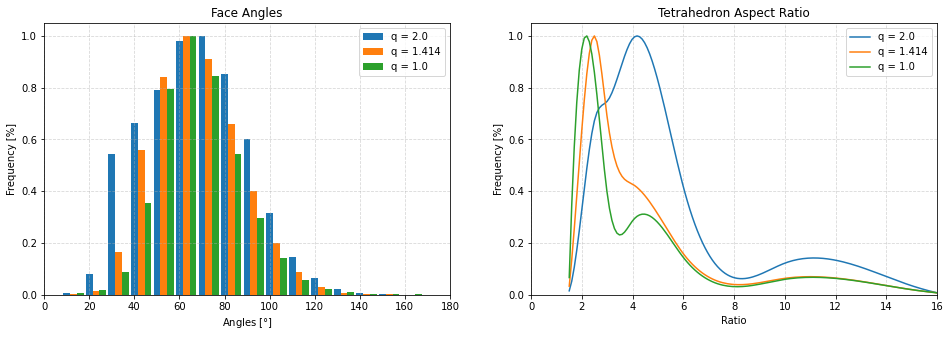

In [6]:
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)


width = 3

# q = 2.0
smoothed = smooth(digedral_angle_values, dihedral_angle_2, 1500)
ax2.plot(smoothed[0], normalize(smoothed[1]), label='q = 2.0')
ax1.bar(faces_angle_values, normalize(face_angle_2), width=width, label='q = 2.0')

# q = 1.414
smoothed = smooth(digedral_angle_values, dihedral_angle_11000414, 1500)
ax2.plot(smoothed[0], normalize(smoothed[1]), label='q = 1.414')
ax1.bar(faces_angle_values + width, normalize(face_angle_1414), width=width, label='q = 1.414')

# q = 1.0
smoothed = smooth(digedral_angle_values, dihedral_angle_1, 1500)
ax2.plot(smoothed[0], normalize(smoothed[1]), label='q = 1.0')
ax1.bar(faces_angle_values + 2.0*width, normalize(face_angle_1), width=width, label='q = 1.0')

ax2.set_xlim([0, 16])
ax2.set_ylim([0, 1.05])
ax1.set_xlim([0, 180])

ax1.set_xlabel('Angles [$\degree$]')
ax1.set_ylabel('Frequency [%]')
ax2.set_xlabel('Ratio')
ax2.set_ylabel('Frequency [%]')

ax1.legend()
ax1.grid(True, ls = '--', alpha = 0.5)
ax1.set_title('Face Angles')

ax2.legend()
ax2.grid(True, ls = '--', alpha = 0.5)
ax2.set_title('Tetrahedron Aspect Ratio')

#plt.show()
plt.savefig('../assets/images/mesh_quality_graphs.pdf', bbox_inches='tight')

# Sweep study

In [172]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline, make_lsq_spline
import pandas as pd

In [173]:
def normalize(x):
    return x/np.amax(x)

def smooth(x, y, smooth_points: int):
    spl = make_interp_spline(x, y, k=3)
    x_smooth = np.linspace(x.min(), x.max(), smooth_points)
    y_new = spl(x_smooth)
    return [x_smooth, y_new]

In [190]:
extra_path = 'data/'
extra_attr = ' - x-axis'
file_names = ['103414', '105014', '105115', '110411', '111716', '113619', '117122', '163129', '196750']

## X-axis line

In [202]:
pd_list = []
pd_list_raw = []
pd_list_norm = []
std = []

thickness_skin = {}
thickness_skull = {}
thickness_csf = {}

for file_name in file_names:
    a = pd.read_csv(os.path.join(extra_path, 'X-axis Line', file_name + extra_attr + '.csv'), encoding='utf-8')
    vals = a.loc[(a['mat_id'] == 1)]['Points:0'].values
    thickness_skin[file_name] = {
        'Left': np.absolute(np.round(vals[vals < 0][0] - vals[vals < 0][-1], 2)),
        'Right': np.absolute(np.round(vals[vals > 0][0] - vals[vals > 0][-1], 2))
    }
    thickness_skin[file_name]['Mean'] = np.round((thickness_skin[file_name]['Left'] + thickness_skin[file_name]['Right'])/2., 2)
    
    vals = a.loc[(a['mat_id'] == 2)]['Points:0'].values
    thickness_skull[file_name] = {
        'Left': np.absolute(np.round(vals[vals < 0][0] - vals[vals < 0][-1], 2)),
        'Right': np.absolute(np.round(vals[vals > 0][0] - vals[vals > 0][-1], 2))
    }
    thickness_skull[file_name]['Mean'] = np.round((thickness_skull[file_name]['Left'] + thickness_skull[file_name]['Right'])/2., 2)
    
    vals = a.loc[(a['mat_id'] == 3)]['Points:0'].values
    thickness_csf[file_name] = {
        'Left': np.absolute(np.round(vals[vals < 0][0] - vals[vals < 0][-1], 2)),
        'Right': np.absolute(np.round(vals[vals > 0][0] - vals[vals > 0][-1], 2))
    }
    thickness_csf[file_name]['Mean'] = np.round((thickness_csf[file_name]['Left'] + thickness_csf[file_name]['Right'])/2., 2)
    
    temp = a.loc[(a['mat_id'] >= 3)&(a['mat_id'] <= 8)]
    pd_list_raw.append(a)
    pd_list.append(temp)
    pd_list_norm.append(temp.max_modulation.rolling(window=50).mean().dropna())
    std.append(temp.std())
    #pd_list[i].max_modulation.rolling(window=50).mean().dropna()

pds = pd.DataFrame(np.hstack(pd_list_norm))
maximum_value = max(pds.max())

In [149]:
skn_thck = np.array([th['Mean'] for th in thickness_skin.values()])
skl_thck = np.array([th['Mean'] for th in thickness_skull.values()])
csf_thck = np.array([th['Mean'] for th in thickness_csf.values()])

In [ ]:
import scipy.stats as stats

stats.ttest_ind(a=tmp,b=skl_thck + skn_thck + csf_thck, equal_var=False)

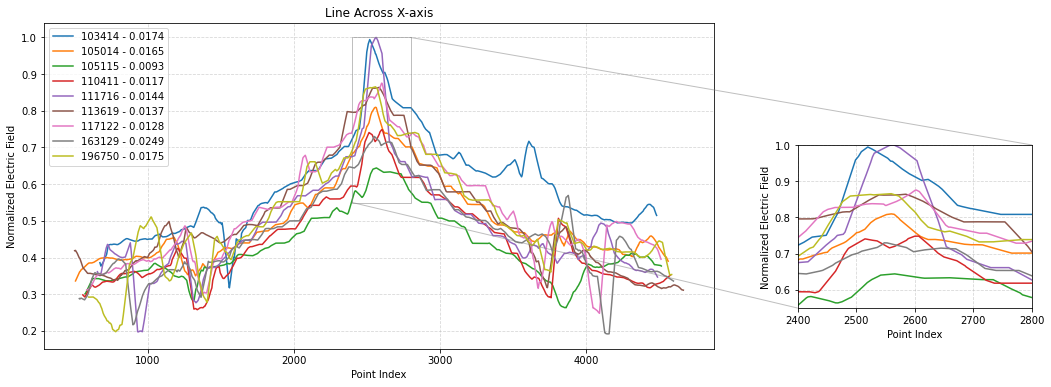

In [203]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 1, 1)

for i in range(0, len(pd_list)):
    ax1.plot(pd_list_norm[i].index, pd_list_norm[i]/maximum_value, label=file_names[i] + ' - ' + str(np.round(std[i].values[0], 4)))

ax1.set_xlabel('Point Index')
ax1.set_ylabel('Normalized Electric Field')

ax1.legend()
ax1.grid(True, ls = '--', alpha = 0.5)
ax1.set_title('Line Across X-axis')

zoom = ax1.inset_axes([1.125, 0.125, 0.35, 0.5])

for i in range(0, len(pd_list)):
    zoom.plot(pd_list_norm[i].index, pd_list_norm[i]/maximum_value)

zoom.set_xlim(2400, 2800)
zoom.set_ylim(0.55, 1)
zoom.set_xlabel('Point Index')
zoom.set_ylabel('Normalized Electric Field')
zoom.grid(True, ls = '--', alpha = 0.5)

ax1.indicate_inset_zoom(zoom)

plt.show()
#plt.savefig('../assets/images/x_axis_line.pdf', bbox_inches='tight')

## Center of bounds

In [251]:
extra_attr = ' - center of bounds'
pd_list = []
pd_list_norm = []
std = []

for file_name in file_names:
    a = pd.read_csv(os.path.join(extra_path, 'Center of Bounds', file_name + extra_attr + '.csv'), encoding='utf-8')
    temp = a.loc[(a['mat_id'] >= 3)&(a['mat_id'] <= 8)]
    pd_list.append(temp)
    pd_list_norm.append(temp.max_modulation.rolling(window=50).mean().dropna())
    std.append(temp.std())
    #pd_list[i].max_modulation.rolling(window=50).mean().dropna()

pds = pd.DataFrame(np.hstack(pd_list_norm))
maximum_value = max(pds.max())

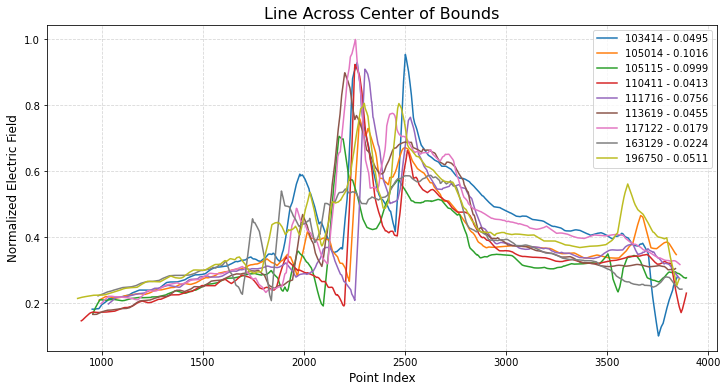

In [253]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 1, 1)

for i in range(0, len(pd_list)):
    ax1.plot(pd_list_norm[i].index, pd_list_norm[i]/maximum_value, label=file_names[i] + ' - ' + str(np.round(std[i].values[0], 4)))

ax1.set_xlabel('Point Index')
ax1.set_ylabel('Normalized Electric Field')

ax1.legend()
ax1.grid(True, ls = '--', alpha = 0.5)
ax1.set_title('Line Across Center of Bounds')

plt.show()
#plt.savefig('../assets/images/center_of_bounds_line.pdf', bbox_inches='tight')

## Layer thickness

## Whole volume

In [315]:
extra_attr = ' - whole volume'
pd_list = []
std = []
mean = []

mean_max_mod_csf = []
mean_max_mod_gm = []
mean_max_mod_wm = []
mean_max_mod_cr = []

std_max_mod_csf = []
std_max_mod_gm = []
std_max_mod_wm = []
std_max_mod_cr = []

for file_name in file_names:
    a = pd.read_csv(os.path.join(extra_path, 'Whole Volume',file_name + extra_attr + '.csv'), encoding='utf-8')
    vals = a.loc[(a['mat_id'] == 3)|(a['mat_id'] == 7)]['max_modulation'].values
    mean_max_mod_csf.append(vals.mean())
    std_max_mod_csf.append(vals.std())
    vals = a.loc[(a['mat_id'] == 4)]['max_modulation'].values
    mean_max_mod_gm.append(vals.mean())
    std_max_mod_gm.append(vals.std())
    vals = a.loc[(a['mat_id'] == 5)]['max_modulation'].values
    mean_max_mod_wm.append(vals.mean())
    std_max_mod_wm.append(vals.std())
    vals = a.loc[(a['mat_id'] == 6)]['max_modulation'].values
    mean_max_mod_cr.append(vals.mean())
    std_max_mod_cr.append(vals.std())
    
    pd_list.append(a)
    std.append(a.max_modulation.std())
    mean.append(a.max_modulation.mean())

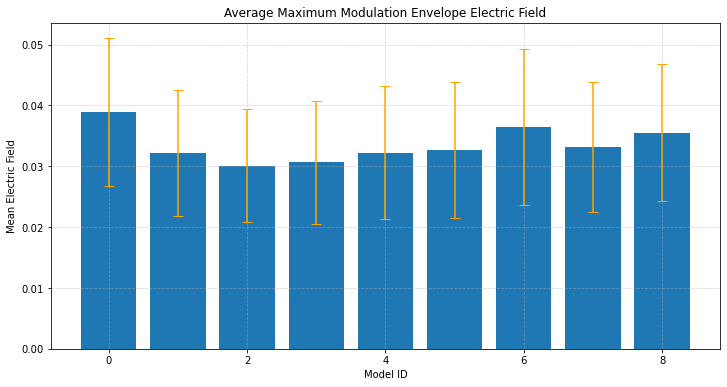

In [184]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(std)
ax1.bar(np.arange(9), mean, yerr=std, align='center', ecolor='orange', capsize=5)
#ax1.plot(skn_thck/np.amax(skn_thck)*np.amax(mean))
#ax1.plot(skl_thck/np.amax(skl_thck)*np.amax(mean))
#ax1.plot(np.arange(9), (skl_thck + skn_thck + csf_thck)/np.amax(skl_thck + skn_thck + csf_thck)*np.amax(mean))
#ax1.plot(np.array(std))
#ax1.plot(np.array(mean))
#ax1.plot(csf_thck/np.amax(csf_thck)*np.amax(mean))

ax1.set_xlabel('Model ID')
ax1.set_ylabel('Mean Electric Field')

#ax1.legend()
ax1.grid(True, ls = '--', alpha = 0.5)
ax1.set_title('Average Maximum Modulation Envelope Electric Field')

plt.show()

## White matter over grey matter

In [69]:
grey_matter = []
white_matter = []

for model in pd_list:
    tmp = model.loc[model['mat_id'] == 4, 'max_modulation']
    grey_matter.append([tmp.mean(), tmp.std()])
    tmp = model.loc[model['mat_id'] == 5, 'max_modulation']
    white_matter.append([tmp.mean(), tmp.std()])
grey_matter = np.array(grey_matter)
white_matter = np.array(white_matter)

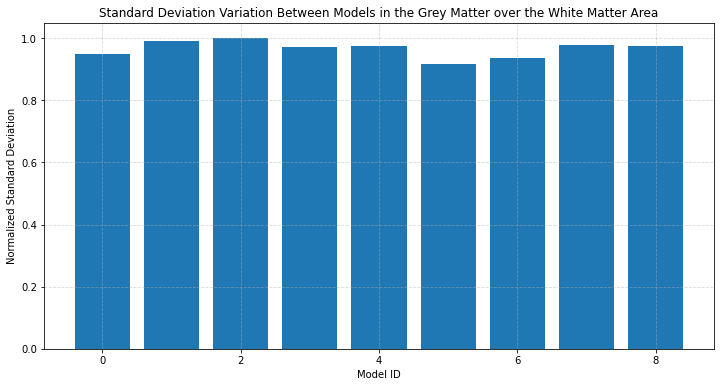

In [89]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 1, 1)

ax1.bar(np.arange(9), (grey_matter[:,1]/white_matter[:,1])/np.amax(grey_matter[:,1]/white_matter[:,1]), align='center')

ax1.set_xlabel('Model ID')
ax1.set_ylabel('Normalized Standard Deviation')

#ax1.legend()
ax1.grid(True, ls = '--', alpha = 0.5)
ax1.set_title('Standard Deviation Variation Between Models in the Grey Matter over the White Matter Area')

plt.show()

## PCA

In [ ]:
import meshio
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [345]:
skn_thck = np.array([th['Mean'] for th in thickness_skin.values()])
skl_thck = np.array([th['Mean'] for th in thickness_skull.values()])
csf_thck = np.array([th['Mean'] for th in thickness_csf.values()])
mean_max_mod_csf = np.array(mean_max_mod_csf)
mean_max_mod_gm = np.array(mean_max_mod_gm)
mean_max_mod_wm = np.array(mean_max_mod_wm)
mean_max_mod_cr = np.array(mean_max_mod_cr)

std_max_mod_csf = np.array(std_max_mod_csf)
std_max_mod_gm = np.array(std_max_mod_gm)
std_max_mod_wm = np.array(std_max_mod_wm)
std_max_mod_cr = np.array(std_max_mod_cr)

"""
skn_vol = np.array(skn_vol)
skl_vol = np.array(skl_vol)
csf_vol = np.array(csf_vol)
gm_vol = np.array(gm_vol)
wm_vol = np.array(wm_vol)
cer_vol = np.array(cer_vol)
"""

pca_df_dict = {
    'skn_thck': skn_thck + skl_thck + csf_thck,
    'mean_max_mod_csf': mean_max_mod_csf,
    'mean_max_mod_gm': mean_max_mod_gm,
    'mean_max_mod_wm': mean_max_mod_wm,
    #'mean_max_mod_cr': mean_max_mod_cr,
    'std_max_mod_csf': std_max_mod_csf,
    'std_max_mod_gm': std_max_mod_gm,
    'std_max_mod_wm': std_max_mod_wm,
    #'std_max_mod_cr': std_max_mod_cr
}
"""
pca_df_dict = {
    #'skn_thck': skn_thck,
    'skl_thck': skl_thck,
    #'csf_thck': csf_thck,
    'mean_max_mod_csf': mean_max_mod_csf,
    'mean_max_mod_gm': mean_max_mod_gm,
    'mean_max_mod_wm': mean_max_mod_wm,
    #'mean_max_mod_cr': mean_max_mod_cr,
    'std_max_mod_csf': std_max_mod_csf,
    'std_max_mod_gm': std_max_mod_gm,
    'std_max_mod_wm': std_max_mod_wm,
    #'std_max_mod_cr': std_max_mod_cr
}
"""
pca_df = pd.DataFrame(data=pca_df_dict)
area_df = pd.DataFrame(data={'model': ['103414', '105014', '105115', '110411', '111716', '113619', '117122', '163129', '196750']})

std_scale = StandardScaler().fit_transform(pca_df)

In [346]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(std_scale)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
fn_df = pd.concat([principalDf, area_df], axis = 1)

print("Explained variance ratio: {}%".format(np.round(np.sum(pca.explained_variance_ratio_)*100, 2)))

Explained variance ratio: 96.18%


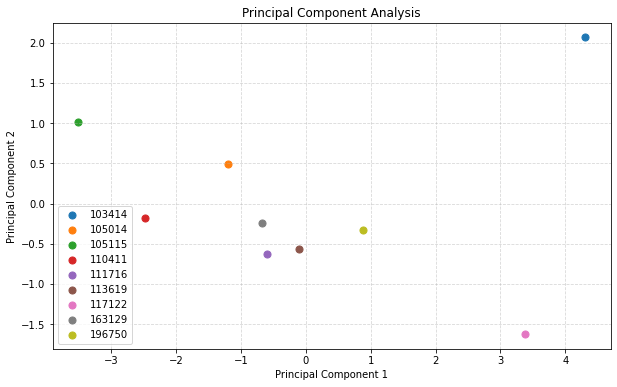

In [347]:
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Principal Component Analysis')

models = ['103414', '105014', '105115', '110411', '111716', '113619', '117122', '163129', '196750']
for model in models:
    indicesToKeep = fn_df['model'] == model
    ax.scatter(fn_df.loc[indicesToKeep, 'principal component 1'], fn_df.loc[indicesToKeep, 'principal component 2'], s = 50)
ax.legend(models)
ax.grid(True, ls = '--', alpha = 0.5)

plt.show()
#plt.savefig('../assets/images/model_pca.pdf', bbox_inches='tight')

# Test Bench

In [4]:
fll = pd.read_csv(os.path.join(extra_path, '103414' + ' - whole volume' + '.csv'), encoding='utf-8')
fll2 = pd.read_csv(os.path.join(extra_path, '105014' + ' - whole volume' + '.csv'), encoding='utf-8')

In [14]:
print(fll.max_modulation.std())
print(fll2.max_modulation.std())

0.012109056855960164
0.010312985276780437


In [6]:
f = interp1d(fll.index, fll.max_modulation)

In [7]:
x = np.arange(2315613)
y = f(x)

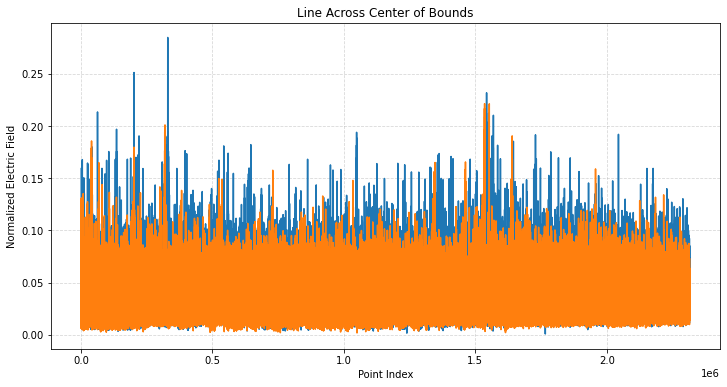

In [12]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 1, 1)

ax1.plot(x, y)
#ax1.plot(fll.index, fll.max_modulation)
ax1.plot(fll2.index, fll2.max_modulation)

ax1.set_xlabel('Point Index')
ax1.set_ylabel('Normalized Electric Field')

#ax1.legend()
ax1.grid(True, ls = '--', alpha = 0.5)
ax1.set_title('Line Across Center of Bounds')

plt.show()
#plt.savefig('../assets/images/center_of_bounds_line.pdf', bbox_inches='tight')

# Mesh convergence

In [185]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline, make_lsq_spline
import pandas as pd

In [186]:
pd_list = []
pd_list_norm = []
std = []

for i in range(3, 9):
    a = pd.read_csv(os.path.join('data/', 'Mesh Convergence', 'convergence_1.' + str(i) + '.csv'), encoding='utf-8')
    temp = a.loc[(a['mat_id'] >= 3)&(a['mat_id'] <= 8)]
    pd_list.append(temp)
    pd_list_norm.append(temp.max_modulation.rolling(window=50).mean().dropna())
    std.append(temp.max_modulation.std())

pds = pd.DataFrame(np.hstack(pd_list_norm))
maximum_value = max(pds.max())

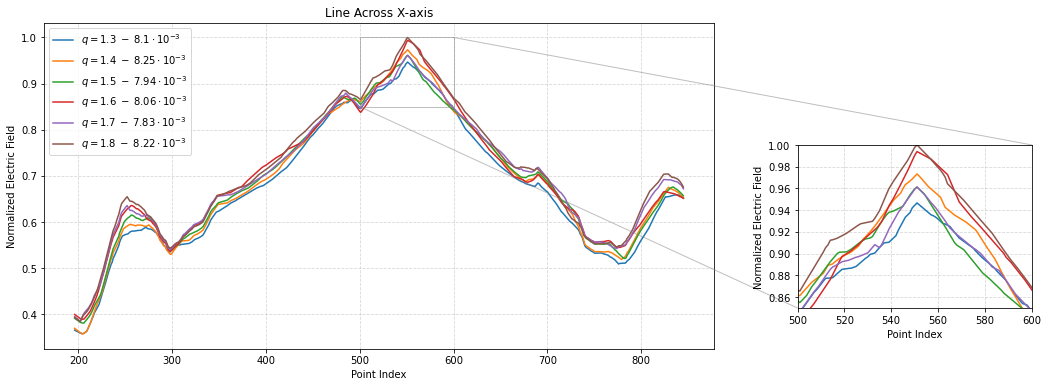

In [189]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 1, 1)

for i in range(0, len(pd_list)):
    ax1.plot(pd_list_norm[i].index, pd_list_norm[i]/maximum_value, label='$q = 1.' + str(i + 3) + '\; - \;' + str(np.round(std[i]*1000, 2)) + '\cdot 10^{-3}$')

ax1.set_xlabel('Point Index')
ax1.set_ylabel('Normalized Electric Field')

ax1.legend()
ax1.grid(True, ls = '--', alpha = 0.5)
ax1.set_title('Line Across X-axis')

zoom = ax1.inset_axes([1.125, 0.125, 0.35, 0.5])

for i in range(0, len(pd_list)):
    zoom.plot(pd_list_norm[i].index, pd_list_norm[i]/maximum_value)

zoom.set_xlim(500, 600)
zoom.set_ylim(0.85, 1)
zoom.set_xlabel('Point Index')
zoom.set_ylabel('Normalized Electric Field')
zoom.grid(True, ls = '--', alpha = 0.5)

ax1.indicate_inset_zoom(zoom)

plt.show()
#plt.savefig('../assets/images/x_axis_line_mesh_conv.pdf', bbox_inches='tight')